# Plot ungroomed and groomed masses

Here we execute a pythia configuration (in "test.cfg" below) for 10000 events, and cluster with AK8. We then compare the ungroomed mass to the groomed mass with soft drop, $\beta=0$ (aka MMDT), $\beta=1$, and $\beta=2$.

## Execute the C++ executable

In [19]:
import subprocess

subprocess.call(['./pythia2fastjet', 'test.cfg', '10000'])

0

## Plot the masses

The C++ executable creates a text file ("config_nEvents_output.txt") that contains 7 fields:

`pT eta phi m(ungroomed) m(groomed,beta=0) m(groomed,beta=1) m(groomed,beta=2)`

We create a simple histogram to compare them. 

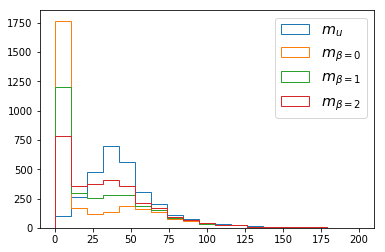

In [21]:
from matplotlib import pyplot as plt
import numpy

pts = []
etas = []
phis = []
mus = []
mb0s = []
mb1s = []
mb2s = []

with open("test.cfg_n10000_output.txt") as f: 
    data = f.readlines() 
    for idata in data:
        pt,eta,phi,mu,mb0,mb1,mb2 = [ float(x) for x in idata.rstrip().split() ]
        pts.append(pt)
        etas.append(eta)
        phis.append(phi)
        mus.append(mu)
        mb0s.append(mb0)
        mb1s.append(mb1)
        mb2s.append(mb2)
        
mbins = numpy.linspace(0, 200, 20)
fig, ax = plt.subplots()

ax.hist( mus,  bins=mbins, histtype='step', label=r'$m_u$' )
ax.hist( mb0s, bins=mbins, histtype='step', label=r'$m_{\beta=0}$')
ax.hist( mb1s, bins=mbins, histtype='step', label=r'$m_{\beta=1}$')
ax.hist( mb2s, bins=mbins, histtype='step', label=r'$m_{\beta=2}$')
legend = ax.legend(loc='upper right', shadow=False, fontsize='x-large')
plt.show()